# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
## Cloaning Git Repo.
!git clone https://github.com/datasciritwik/movie-site-webscraping-project.git

Cloning into 'movie-site-webscraping-project'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 16 (delta 3), reused 2 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 16.52 KiB | 16.52 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
#Installing all necessary labraries
!pip install -r movie-site-webscraping-project/requirements.txt
!pip install country-named-entity-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 44.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595771 sha256=13179a44041083109a6c885f9c5bca4567afa29098d2cd9e656530883217905d
  Stored in directory: /root/.cache/pip/wheels/af/b7/c5/85d1ae48e8e5696f1bd5664c7257ba7253f390f7b73d57edab
Successfully built pycountry


In [3]:
## Importing custum methods from stript.py
%cd movie-site-webscraping-project/
from script import site_scraper, extract_info
%cd ../

/content/movie-site-webscraping-project
/content


In [4]:
#import all necessary labraries
from country_named_entity_recognition import find_countries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

# **Movies**

## **Scrapping Movies Data**

In [5]:
movie_url = ' https://www.justwatch.com/in/movies?release_year_from=2000'
scrape_movie = site_scraper(movie_url)
if scrape_movie:
  print("- Successfully Scraped Movies Data")

- Successfully Scraped Movies Data


## **Fetching Movie URL's**

In [6]:
# Write Your Code here
movie_links = scrape_movie.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]
movie_list=[]
for x in movie_urls:
  movie_list.append('https://www.justwatch.com'+x)

print(f"- Total Movie Fetched {len(movie_list)}")

- Total Movie Fetched 110


In [7]:
## Scraping and saving data from each movie page
movies_data = extract_info(movie_list, msec=5)  ## Delay before hitting second URL
'''
NOTE: Decreasing the msec time might cause loss of data while fetching.
'''
if movies_data:
  print("\n- Successfully Scraped Movie Data")

- Extracting: 100%|██████████| 110/110 [10:01<00:00,  5.47s/it]


- Successfully Scraped Movie Data


## **Scrapping Movie Title and release Year**

In [8]:
# Write Your Code here
st = time.time()
movie_titles_years = []
for i, data in enumerate(movies_data):
    try:
        title = data.find("h1")
        movie_titles_years.append(title.text)
    except:
        print(f"- Data not found {i}")
print(f"- Total data stored {len(movie_titles_years)} in {round(time.time()-st, 2)}sec.")

- Total data stored 110 in 0.06sec.


## **Scrapping Genres**

In [9]:
# Write Your Code here
st = time.time()
genres = []
for i, data in enumerate(movies_data):
    try:
        genre = data.find_all("div", class_="detail-infos__value")

        gen = []
        for div in genre:
            span = div.find("span")
            if span and not span.find("span"):  # Ensure it's not nested span
                gen.append(span.text.strip())
        genres.append(gen[0])
    except:
        print(f"- Data not found {i}")
print(f"- Total data stored {len(genres)} in {round(time.time()-st, 2)}sec.")

- Total data stored 110 in 0.93sec.


In [10]:
movie_titles_years[1], genres[1],

(' Kill (2024)', 'Mystery & Thriller, Action & Adventure, Crime, Drama')

## **Scrapping IMBD Rating**

In [11]:
# Write Your Code here
st = time.time()
imdb_ratings = []
for i, data in enumerate(movies_data):
    try:
      rating = data.find("span", class_="imdb-score")
      imdb_ratings.append(rating.text)
    except:
      print(f"- Data not found {i}")
      imdb_ratings.append(None) ## assigning None for keeping the total number of count intact.
print(f"- Total data stored {len(imdb_ratings)} in {round(time.time()-st, 2)}sec.")

- Data not found 81
- Data not found 107
- Data not found 108
- Data not found 109
- Total data stored 110 in 0.09sec.


## **Available Streaming Services**

In [19]:
st = time.time()
streaming_services = []
for i, data in enumerate(movies_data):
    try:
      streaming = data.find_all('p')
      out = [ste.text for ste in streaming if ste.text.startswith('Currently you are able')]
      if len(out) != 0:
          streaming_services.append(out[0])
      else:
        streaming_services.append("Currently Unavailable")
    except Exception as e:
        print(f"- Data not found {i}")
print(f"- Total Number of Records {len(streaming_services)}")

- Total Number of Records 110


## **Scrapping Runtime/Duration**

In [13]:
# Write Your Code here
st = time.time()
runtimes = []
for i, data in enumerate(movies_data):
    try:
      runtime = data.find_all("div", class_="detail-infos__value")
      run = [i.text for i in runtime if i.text.strip().endswith('min')]
      runtimes.append(run[0])
    except:
      print(f"- Data not found {i}")
      runtimes.append(None)
print(f"- Total data stored {len(runtimes)} in {round(time.time()-st, 2)}sec.")

- Total data stored 110 in 0.8sec.


## **Scrapping Age Rating**

In [14]:
# Write Your Code here
st = time.time()
age_rating_tag = []
for i, data in enumerate(movies_data):
    try:
      age_rating = data.find_all("div", class_="detail-infos__value")
      agerate = [i.text for i in age_rating if i.text.strip() in ["UA", "A", "U", "PG", "R", "UA7+", "S", "UA16+", "UA13+"]]
      age_rating_tag.append(agerate[0])
    except:
      print(f"- Data not found {i}  ", end='')
      age_rating_tag.append(None)
print(f"\n- Total data stored {len(age_rating_tag)} in {round(time.time()-st, 2)}sec.")

- Data not found 0  - Data not found 3  - Data not found 4  - Data not found 6  - Data not found 7  - Data not found 8  - Data not found 16  - Data not found 18  - Data not found 22  - Data not found 23  - Data not found 28  - Data not found 29  - Data not found 31  - Data not found 32  - Data not found 35  - Data not found 37  - Data not found 39  - Data not found 41  - Data not found 46  - Data not found 47  - Data not found 48  - Data not found 55  - Data not found 59  - Data not found 62  - Data not found 64  - Data not found 69  - Data not found 76  - Data not found 79  - Data not found 81  - Data not found 83  - Data not found 85  - Data not found 91  - Data not found 96  - Data not found 99  - Data not found 100  - Data not found 103  - Data not found 104  - Data not found 106  - Data not found 107  - Data not found 108  - Data not found 109  
- Total data stored 110 in 0.54sec.


## **Fetching Production Countries Details**

In [15]:
st = time.time()
production_countries = []
for i, data in enumerate(movies_data):
  try:
    production_country = data.find_all("div", class_="detail-infos__value")
    out = [find_countries(i.text) for i in production_country if find_countries(i.text)]
    name = [n[0].name for n in out[0]]
    production_countries.append(','.join(name))
  except:
    print(f"- Data not found {i}")
    production_countries.append(None)
print(f"- Total data stored {len(production_countries)} in {round(time.time()-st, 2)}sec.")

- Total data stored 110 in 0.57sec.


## **Fetching Streaming JustWatch URL**

In [16]:
# Write Your Code here
st = time.time()
justwatchs = []
for i, data in enumerate(movies_data):
    try:
        canonical_link = data.find('link', rel='canonical')
        if len(canonical_link['href']) != 0:
            justwatchs.append(canonical_link['href'])
    except:
        print(f"- Data not found {i}")
        justwatchs.append(None)
print(f"- Total data stored {len(justwatchs)} in {round(time.time()-st, 2)}sec.")

- Total data stored 110 in 0.02sec.


## **Now Creating Movies DataFrame**

In [20]:
# Write Your Code here
data_dict = {
    'Title_Year': movie_titles_years,
    'Genre': genres,
    'IMDB Rating': imdb_ratings,
    'Streaming Service': streaming_services,
    'Runtime': runtimes,
    'Age Rating': age_rating_tag,
    'Production Country': production_countries,
    'JustWatch URL': justwatchs
}
movie_df = pd.DataFrame(data_dict)
movie_df.head()

,Title_Year,Genre,IMDB Rating,Streaming Service,Runtime,Age Rating,Production Country,JustWatch URL
0,Maharaja (2024),"Crime, Drama, Mystery & Thriller, Action & Adv...",8.7 (31k),"Currently you are able to watch ""Maharaja"" str...",2h 30min,None,India,https://www.justwatch.com/in/movie/maharaja-2024
1,Kill (2024),"Mystery & Thriller, Action & Adventure, Crime,...",7.7 (15k),Currently Unavailable,1h 45min,A,"India,United States",https://www.justwatch.com/in/movie/kill-2024
2,Kalki 2898-AD (2024),"Fantasy, Science-Fiction, Drama, Action & Adve...",7.6 (42k),Currently Unavailable,3h 1min,UA,India,https://www.justwatch.com/in/movie/project-k
3,Munjya (2024),"Comedy, Horror",7.2 (15k),Currently Unavailable,2h 3min,None,India,https://www.justwatch.com/in/movie/munjha
4,"The Gangster, the Cop, the Devil (2019)","Crime, Action & Adventure, Mystery & Thriller",6.9 (25k),"Currently you are able to watch ""The Gangster,...",1h 50min,None,"Korea, Republic of",https://www.justwatch.com/in/movie/the-gangste...


## **Saving Raw Movies Datasets in csv File**

In [21]:
movie_df.to_csv('raw_movies_data.csv', index=False)

# **TV Shows**

## **Scraping TV  Show Data**

In [22]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
scrape_shows = site_scraper(tv_url)
if scrape_shows:
  print("- Successfully Scraped Movies Data")

- Successfully Scraped Movies Data


## **Fetching Tv shows Url details**

In [23]:
# Write Your Code here
shows_links = scrape_shows.find_all('a', href=True)
shows_urls = [link['href'] for link in shows_links if '/tv-show/' in link['href']]
shows_list=[]
for x in shows_urls:
  shows_list.append('https://www.justwatch.com'+x)

print(f"- Total TV Shows Fetched {len(shows_list)}")

- Total TV Shows Fetched 110


In [24]:
## Scraping and saving data from each tv shows page
shows_data = extract_info(shows_list, msec=5)  ## Delay before hitting second URL
if shows_data:
  print("\n- Successfully Scraped Movie Data")

- Extracting: 100%|██████████| 110/110 [10:01<00:00,  5.46s/it]


- Successfully Scraped Movie Data


## **Fetching Tv Show Title details and Release Year**

In [25]:
# Write Your Code here
st = time.time()
shows_titles_years = []
for i, data in enumerate(shows_data):
    try:
        title = data.find("h1")
        shows_titles_years.append(title.text)
    except:
        print(f"- Data not found {i}")
print(f"- Total data stored {len(shows_titles_years)} in {round(time.time()-st, 2)}sec.")

- Total data stored 110 in 0.03sec.


## **Fetching TV Show Genre Details**

In [26]:
# Write Your Code here
st = time.time()
shows_genres = []
for i, data in enumerate(shows_data):
    try:
        genre = data.find_all("div", class_="detail-infos__value")
        gen = []
        for div in genre:
            span = div.find("span")
            if span and not span.find("span"):  # Ensure it's not nested span
                gen.append(span.text.strip())
        shows_genres.append(gen[0])
    except:
        print(f"- Data not found {i}")
print(f"- Total data stored {len(shows_genres)} in {round(time.time()-st, 2)}sec.")

- Total data stored 110 in 0.51sec.


In [27]:
shows_titles_years[0],shows_genres[0]

(' Mirzapur (2018)', 'Action & Adventure, Drama, Crime, Mystery & Thriller')

## **Fetching IMDB Rating Details**

In [28]:
# Write Your Code here
st = time.time()
shows_imdb_ratings = []
for i, data in enumerate(shows_data):
    try:
      rating = data.find("span", class_="imdb-score")
      shows_imdb_ratings.append(rating.text)
    except:
      print(f"- Data not found {i}")
      shows_imdb_ratings.append(None) ## assigning None for keeping the total number of count intact.
print(f"- Total data stored {len(shows_imdb_ratings)} in {round(time.time()-st, 2)}sec.")

- Data not found 89
- Total data stored 110 in 0.05sec.


## **Available Streaming Services**

In [29]:
st = time.time()
show_streaming_services = []
for i, data in enumerate(shows_data):
    try:
      streaming = data.find_all('p')
      out = [ste.text for ste in streaming if ste.text.startswith('Currently you are able')]
      if len(out) != 0:
        show_streaming_services.append(out[0])
      else:
        show_streaming_services.append("Currently Unavailable")
    except Exception as e:
        print(f"- Data not found {i}")
print(f"- Total Number of Records {len(show_streaming_services)}")

- Total Number of Records 110


## **Scrapping Runtime/Duration**

In [30]:
# Write Your Code here
st = time.time()
shows_runtimes = []
for i, data in enumerate(shows_data):
    try:
      runtime = data.find_all("div", class_="detail-infos__value")
      run = [i.text for i in runtime if i.text.strip().endswith('min')]
      shows_runtimes.append(run[0])
    except:
      print(f"- Data not found {i}")
      shows_runtimes.append(None)
print(f"- Total data stored {len(shows_runtimes)} in {round(time.time()-st, 2)}sec.")

- Data not found 109
- Total data stored 110 in 0.49sec.


## **Fetching Age Rating Details**

In [31]:
# Write Your Code here
st = time.time()
shows_age_rating_tag = []
for i, data in enumerate(shows_data):
    try:
      age_rating = data.find_all("div", class_="detail-infos__value")
      agerate = [i.text for i in age_rating if i.text.strip() in ["UA", "A", "U", "PG", "R", "UA7+", "S", "UA16+", "UA13+"]]
      shows_age_rating_tag.append(agerate[0])
    except:
      print(f"- Data not found {i}  ", end='')
      shows_age_rating_tag.append(None)
print(f"\n- Total data stored {len(shows_age_rating_tag)} in {round(time.time()-st, 2)}sec.")

- Data not found 3  - Data not found 6  - Data not found 7  - Data not found 8  - Data not found 9  - Data not found 10  - Data not found 12  - Data not found 15  - Data not found 17  - Data not found 19  - Data not found 20  - Data not found 21  - Data not found 22  - Data not found 23  - Data not found 25  - Data not found 26  - Data not found 28  - Data not found 29  - Data not found 30  - Data not found 33  - Data not found 34  - Data not found 35  - Data not found 36  - Data not found 37  - Data not found 38  - Data not found 39  - Data not found 43  - Data not found 46  - Data not found 48  - Data not found 54  - Data not found 56  - Data not found 57  - Data not found 58  - Data not found 59  - Data not found 62  - Data not found 63  - Data not found 64  - Data not found 65  - Data not found 66  - Data not found 67  - Data not found 70  - Data not found 73  - Data not found 75  - Data not found 77  - Data not found 78  - Data not found 81  - Data not found 83  - Data not found 8

## **Fetching Production Country details**

In [32]:
# Write Your Code here
st = time.time()
shows_production_countries = []
for i, data in enumerate(shows_data):
  try:
    production_country = data.find_all("div", class_="detail-infos__value")
    out = [find_countries(i.text) for i in production_country if find_countries(i.text)]
    name = [n[0].name for n in out[0]]
    shows_production_countries.append(','.join(name))
  except:
    print(f"- Data not found {i}")
    shows_production_countries.append(None)
print(f"- Total data stored {len(shows_production_countries)} in {round(time.time()-st, 2)}sec.")

- Total data stored 110 in 0.54sec.


## **Fetching Streaming JustWatch URL**

In [33]:
# Write Your Code here
st = time.time()
show_justwatchs = []
for i, data in enumerate(shows_data):
    try:
        canonical_link = data.find('link', rel='canonical')
        if len(canonical_link['href']) != 0:
            show_justwatchs.append(canonical_link['href'])
    except:
        print(f"- Data not found {i}")
        show_justwatchs.append(None)
print(f"- Total data stored {len(show_justwatchs)} in {round(time.time()-st, 2)}sec.")

- Total data stored 110 in 0.02sec.


## **Creating TV Show DataFrame**

In [34]:
# Write Your Code here
show_data_dict = {
    'Title_Year': shows_titles_years,
    'Genre': shows_genres,
    'IMDB Rating': shows_imdb_ratings,
    'Streaming Service': show_streaming_services,
    'Runtime': shows_runtimes,
    'Age Rating': shows_age_rating_tag,
    'Production Country': shows_production_countries,
    'JustWatch URL': show_justwatchs
}
shows_df = pd.DataFrame(show_data_dict)
shows_df.head()

,Title_Year,Genre,IMDB Rating,Streaming Service,Runtime,Age Rating,Production Country,JustWatch URL
0,Mirzapur (2018),"Action & Adventure, Drama, Crime, Mystery & Th...",8.5 (86k),"Currently you are able to watch ""Mirzapur"" str...",50min,A,India,https://www.justwatch.com/in/tv-show/mirzapur
1,House of the Dragon (2022),"Drama, Action & Adventure, Science-Fiction, Fa...",8.4 (423k),"Currently you are able to watch ""House of the ...",1h 2min,A,United States,https://www.justwatch.com/in/tv-show/house-of-...
2,The Boys (2019),"Action & Adventure, Science-Fiction, Comedy, C...",8.7 (704k),"Currently you are able to watch ""The Boys"" str...",1h 1min,A,United States,https://www.justwatch.com/in/tv-show/the-boys
3,Panchayat (2020),"Comedy, Drama",9.0 (96k),"Currently you are able to watch ""Panchayat"" st...",35min,None,India,https://www.justwatch.com/in/tv-show/panchayat
4,Sweet Home (2020),"Science-Fiction, Fantasy, Horror, Mystery & Th...",7.3 (34k),"Currently you are able to watch ""Sweet Home"" s...",58min,A,"Korea, Republic of",https://www.justwatch.com/in/tv-show/sweet-home


## **Saving Raw TV Shows Datasets in csv File**

In [35]:
shows_df.to_csv('raw_shows_data.csv', index=False)

# **Data Analysis**

## **Freeing memory space**

In [36]:
## Deleting Lists
if movies_data:
  del movies_data
if shows_data:
  del shows_data

## **Task 2 :- Data Filtering & Analysis**

In [40]:
# Write Your Code here
if movie_df is not None:
  movie = pd.read_csv('/content/raw_movies_data.csv')
  show = pd.read_csv('/content/raw_shows_data.csv')
  print("- Sucessfully load the dataset locally")
else:
  movie = pd.read_csv('/content/movie-site-webscraping-project/raw_movies_data.csv')
  show = pd.read_csv('/content/movie-site-webscraping-project/raw_shows_data.csv')
  print("- Sucessfully load the dataset from Github")

- Sucessfully load the dataset locally


## **Movie Dataset Cleaning**

In [41]:
## Movies Dataset shape
print(movie.shape)

(110, 8)


In [72]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 109
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genre               105 non-null    object 
 1   IMDB Rating         101 non-null    float64
 2   Streaming Service   105 non-null    object 
 3   Runtime             105 non-null    object 
 4   Age Rating          67 non-null     object 
 5   Production Country  105 non-null    object 
 6   JustWatch URL       105 non-null    object 
 7   Title               105 non-null    object 
 8   Year                105 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 12.3+ KB


In [71]:
movie.head(3)

,Genre,IMDB Rating,Streaming Service,Runtime,Age Rating,Production Country,JustWatch URL,Title,Year
0,"Crime, Drama, Mystery & Thriller, Action & Adv...",8.7,"Currently you are able to watch ""Maharaja"" str...",2h 30min,NaN,India,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja,2024
1,"Mystery & Thriller, Action & Adventure, Crime,...",7.7,Currently Unavailable,1h 45min,A,"India,United States",https://www.justwatch.com/in/movie/kill-2024,Kill,2024
2,"Fantasy, Science-Fiction, Drama, Action & Adve...",7.6,Currently Unavailable,3h 1min,UA,India,https://www.justwatch.com/in/movie/project-k,Kalki 2898-AD,2024


In [44]:
movie.isnull().sum()

,0
Title_Year,0
Genre,0
IMDB Rating,4
Streaming Service,0
Runtime,0
Age Rating,41
Production Country,0
JustWatch URL,0


In [47]:
movie.duplicated().sum()

5

In [48]:
movie.drop_duplicates(inplace=True)

In [57]:
movie['Title'] = movie['Title_Year'].apply(lambda x: x.split('(')[0])
movie['Year'] = movie['Title_Year'].apply(lambda x: x.split('(')[1][0:-1]).astype(int)
movie.drop('Title_Year', axis=1, inplace=True)

In [70]:
movie['IMDB Rating'] = movie['IMDB Rating'].str.extract('(\d+\.\d+)').astype(float)

## **TV Shows Dataset Cleaning**

In [73]:
print(show.shape)

(110, 8)


In [74]:
show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title_Year          110 non-null    object
 1   Genre               110 non-null    object
 2   IMDB Rating         109 non-null    object
 3   Streaming Service   110 non-null    object
 4   Runtime             109 non-null    object
 5   Age Rating          43 non-null     object
 6   Production Country  110 non-null    object
 7   JustWatch URL       110 non-null    object
dtypes: object(8)
memory usage: 7.0+ KB


In [85]:
show.head(3)

,Genre,IMDB Rating,Streaming Service,Runtime,Age Rating,Production Country,JustWatch URL,Title,Year
0,"Action & Adventure, Drama, Crime, Mystery & Th...",8.5,"Currently you are able to watch ""Mirzapur"" str...",50min,A,India,https://www.justwatch.com/in/tv-show/mirzapur,Mirzapur,2018
1,"Drama, Action & Adventure, Science-Fiction, Fa...",8.4,"Currently you are able to watch ""House of the ...",1h 2min,A,United States,https://www.justwatch.com/in/tv-show/house-of-...,House of the Dragon,2022
2,"Action & Adventure, Science-Fiction, Comedy, C...",8.7,"Currently you are able to watch ""The Boys"" str...",1h 1min,A,United States,https://www.justwatch.com/in/tv-show/the-boys,The Boys,2019


In [77]:
show.isnull().sum()

,0
Title_Year,0
Genre,0
IMDB Rating,1
Streaming Service,0
Runtime,1
Age Rating,67
Production Country,0
JustWatch URL,0


In [78]:
show.duplicated().sum()

5

In [79]:
show.drop_duplicates(inplace=True)

In [81]:
show['Title'] = show['Title_Year'].apply(lambda x: x.split('(')[0])
show['Year'] = show['Title_Year'].apply(lambda x: x.split('(')[1][0:-1]).astype(int)
show.drop('Title_Year', axis=1, inplace=True)

In [84]:
show['IMDB Rating'] = show['IMDB Rating'].str.extract('(\d+\.\d+)').astype(float)

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [87]:
# Write Your Code here
movie_mean = movie['IMDB Rating'].mean()
show_mean = show['IMDB Rating'].mean()

print(f"- Mean IMDB Rating for Movies: {round(movie_mean, 1)}")
print(f"- Mean IMDB Rating for TV Shows: {round(show_mean, 1)}")

- Mean IMDB Rating for Movies: 7.1
- Mean IMDB Rating for TV Shows: 7.6


## **Analyzing Top Genres**

In [127]:
# Write Your Code here
all_genres_movie = []
for i in movie['Genre']:
  all_genres_movie.extend(i.split(','))

all_genres_show = []
for i in show['Genre']:
  all_genres_show.extend(i.split(','))

In [132]:
genre_count_movie = {}
for genre in all_genres_movie:
  if genre.startswith(" "):
    genre = genre[1:]
  if genre in genre_count_movie:
      genre_count_movie[genre] += 1
  else:
      genre_count_movie[genre] = 1

genre_count_show = {}
for genre in all_genres_show:
  if genre.startswith(" "):
      genre = genre[1:]
  if genre in genre_count_show:
      genre_count_show[genre] += 1
  else:
      genre_count_show[genre] = 1

<ipython-input-137-0547d9c2ea9f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[genre for genre, count in sorted_genres], y=[count for genre, count in sorted_genres], palette='colorblind')


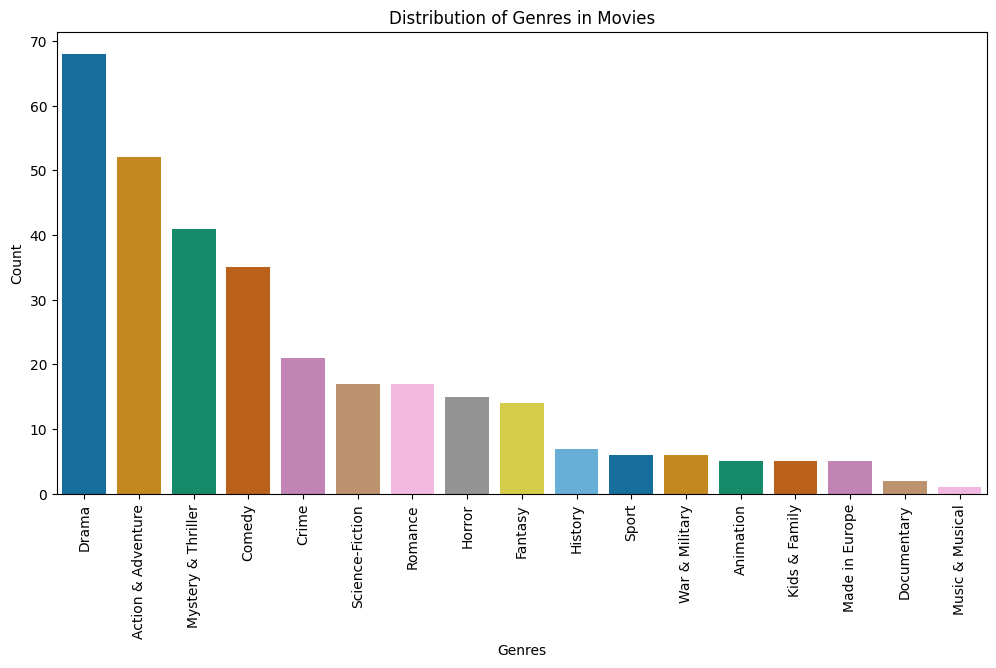

In [137]:
sorted_genres = sorted(genre_count_movie.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=[genre for genre, count in sorted_genres], y=[count for genre, count in sorted_genres], palette='colorblind')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres in Movies')
plt.show()

<ipython-input-138-4c4bc17317d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[genre for genre, count in sorted_genres], y=[count for genre, count in sorted_genres], palette='colorblind')


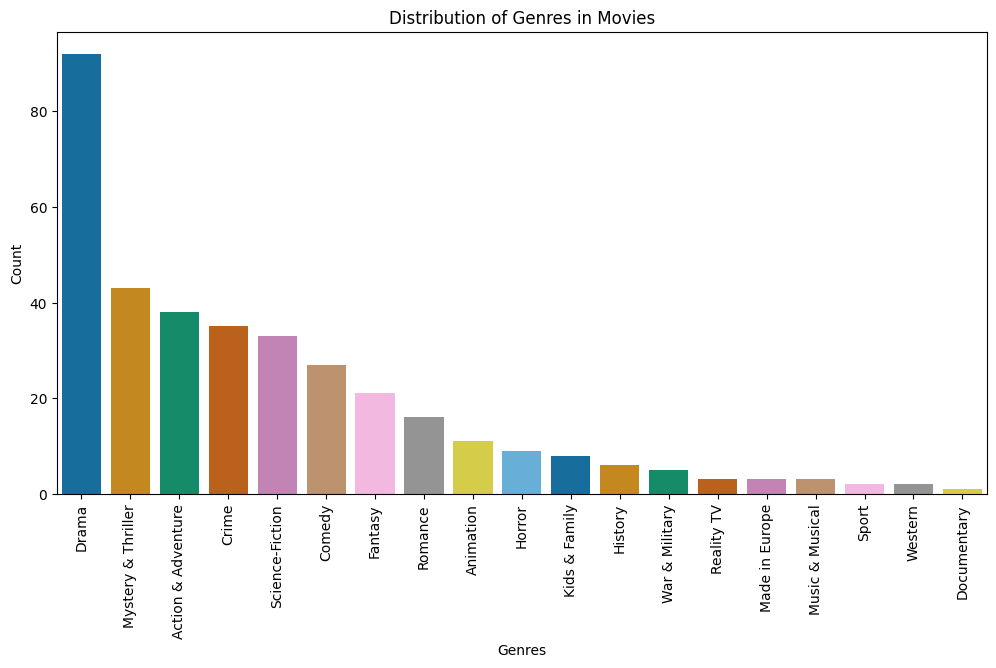

In [138]:
sorted_genres = sorted(genre_count_show.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=[genre for genre, count in sorted_genres], y=[count for genre, count in sorted_genres], palette='colorblind')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres in Movies')
plt.show()

In [140]:
from wordcloud import WordCloud, STOPWORDS

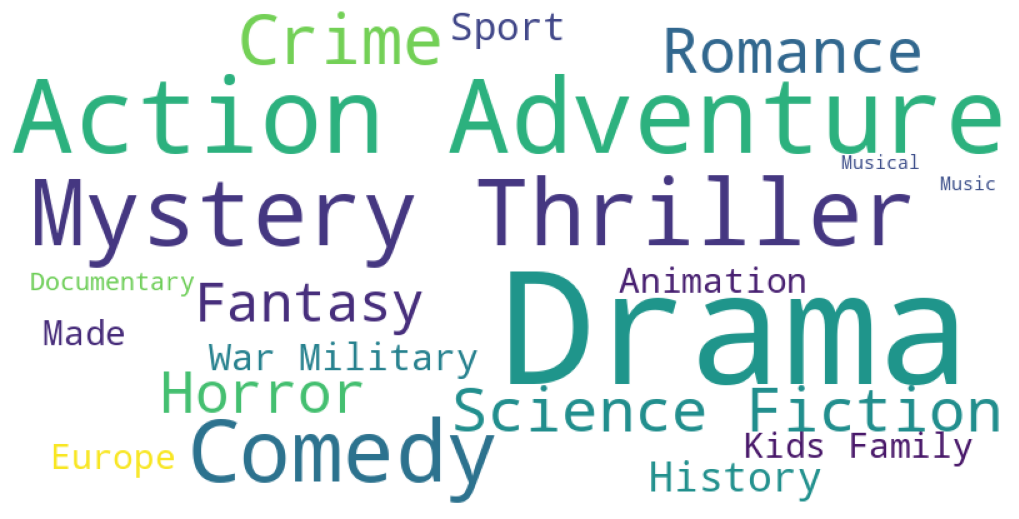

In [143]:

text = ','.join(movie['Genre'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


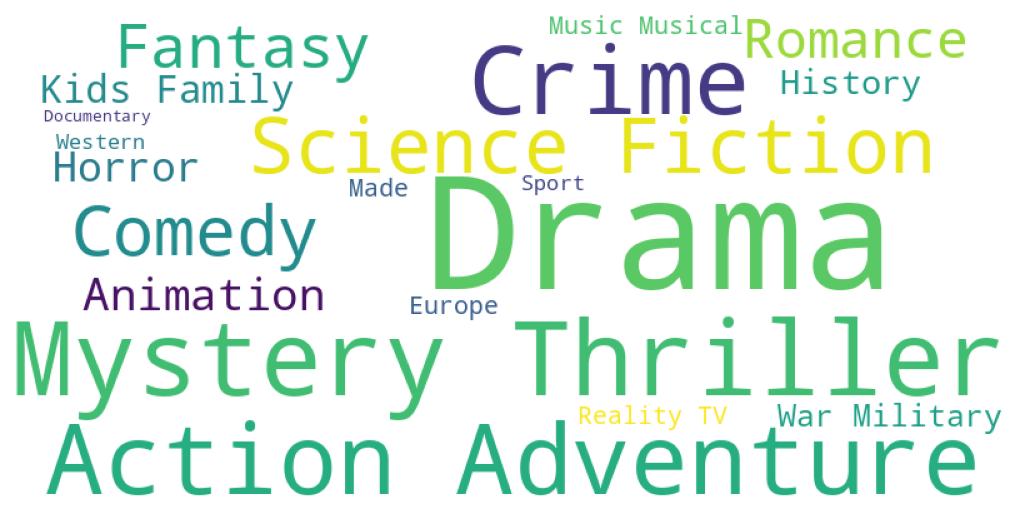

In [145]:

text = ','.join(show['Genre'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## **Finding Predominant Streaming Service**

In [152]:
from collections import Counter
import re

# Define a function to extract streaming service names
def extract_service(streaming_info):
    # Look for phrases like "on Netflix", "on Amazon Prime Video", etc.
    services = re.findall(r'on ([A-Za-z\s]+)', streaming_info)
    return services

# Apply the function to extract services
movie['Extracted Services'] = movie['Streaming Service'].apply(lambda x: extract_service(str(x)))

# Flatten the list of services
all_services = [service for sublist in movie['Extracted Services'] for service in sublist]

# Count the occurrences of each service
service_counts = Counter(all_services)

# Find the most common service
predominant_service = service_counts.most_common(1)

print(predominant_service)

[('Netflix', 25)]


In [153]:
service_counts_dict = dict(service_counts)

<ipython-input-156-e0d89ea97310>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


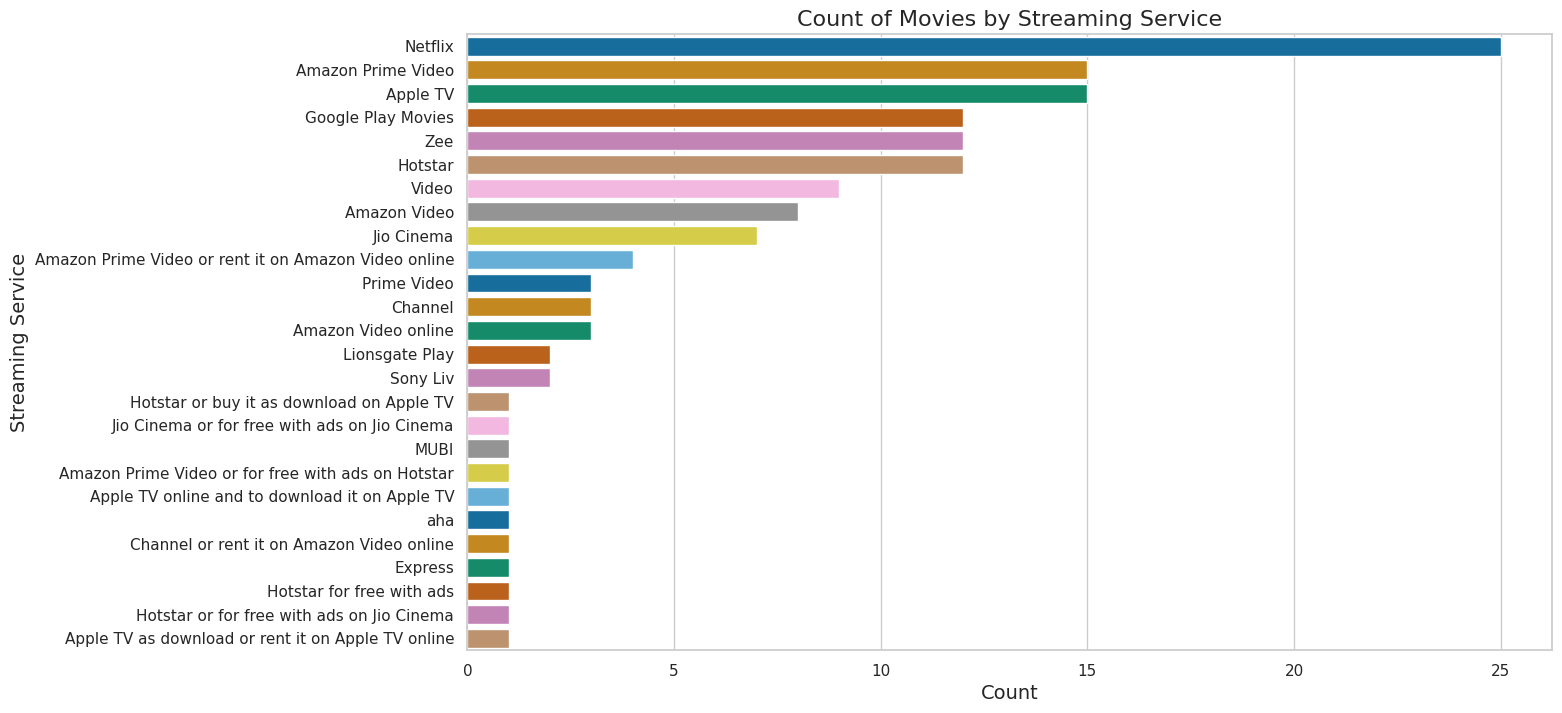

In [156]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a DataFrame from the service counts dictionary
service_counts_df = pd.DataFrame.from_dict(service_counts_dict, orient='index', columns=['Count']).reset_index()
service_counts_df.rename(columns={'index': 'Streaming Service'}, inplace=True)

# Sort the DataFrame by count
service_counts_df = service_counts_df.sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    x='Count',
    y='Streaming Service',
    data=service_counts_df,
    palette='colorblind'
)

# Add title and labels
plt.title('Count of Movies by Streaming Service', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Streaming Service', fontsize=14)

# Show the plot
plt.show()

In [164]:
new = ['rent', 'download', 'buy', 'ads', 'channel', 'free', 'video']
STOPWORDS.update(new)

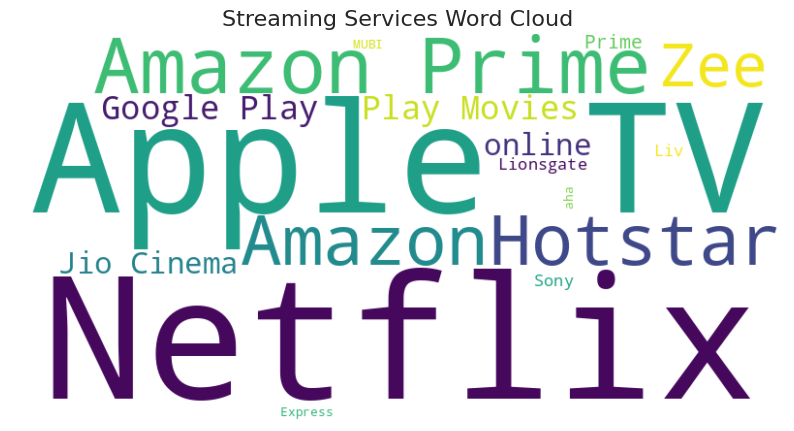

In [165]:
# Combine all service names into a single string
all_services_str = ' '.join(all_services)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_services_str)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Streaming Services Word Cloud', fontsize=16)
plt.show()

In [166]:
# Define a function to extract streaming service names
def extract_service(streaming_info):
    # Look for phrases like "on Netflix", "on Amazon Prime Video", etc.
    services = re.findall(r'on ([A-Za-z\s]+)', streaming_info)
    return services

# Apply the function to extract services
show['Extracted Services'] = show['Streaming Service'].apply(lambda x: extract_service(str(x)))

# Flatten the list of services
all_services = [service for sublist in show['Extracted Services'] for service in sublist]

# Count the occurrences of each service
service_counts = Counter(all_services)

# Find the most common service
predominant_service = service_counts.most_common(1)

print(predominant_service)

[('Netflix', 35)]


In [167]:
service_counts_dict = dict(service_counts)

<ipython-input-168-5673e2063848>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


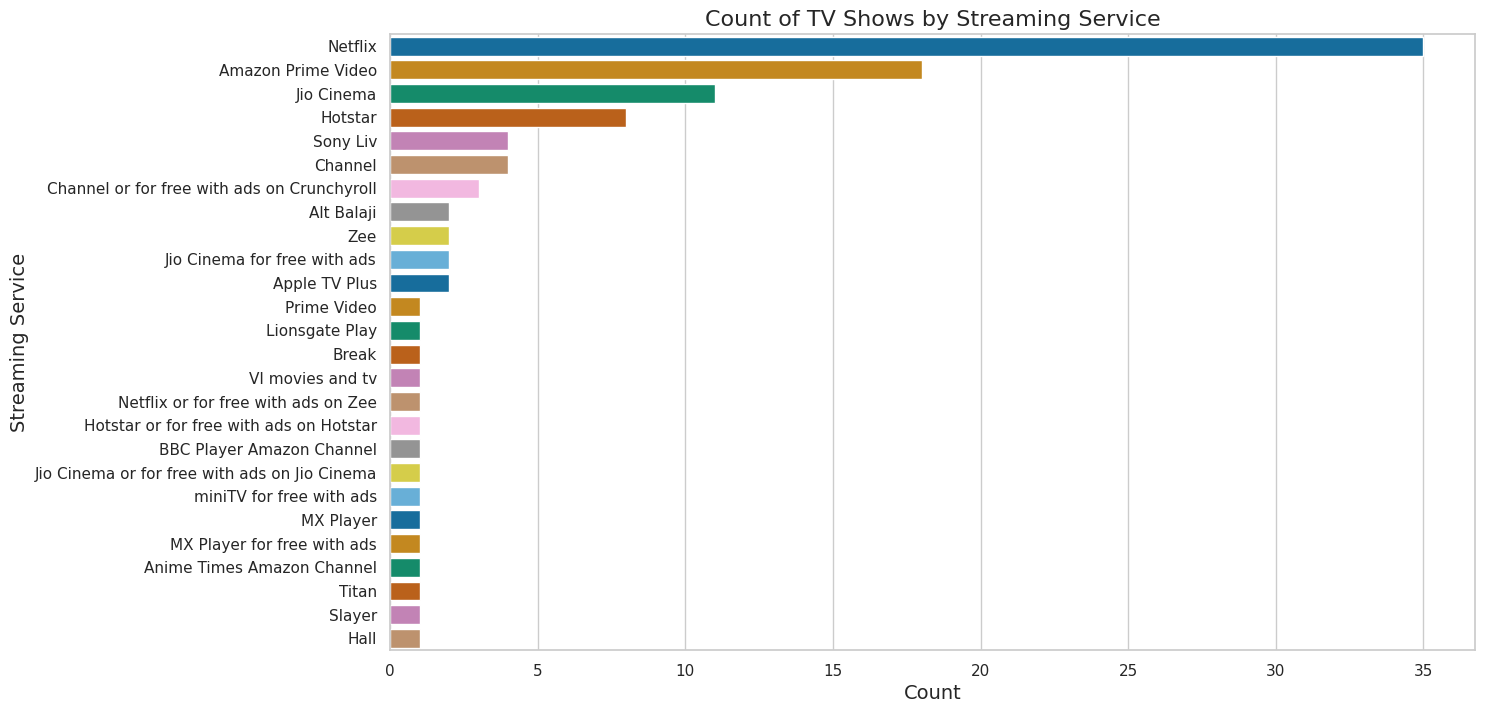

In [168]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a DataFrame from the service counts dictionary
service_counts_df = pd.DataFrame.from_dict(service_counts_dict, orient='index', columns=['Count']).reset_index()
service_counts_df.rename(columns={'index': 'Streaming Service'}, inplace=True)

# Sort the DataFrame by count
service_counts_df = service_counts_df.sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    x='Count',
    y='Streaming Service',
    data=service_counts_df,
    palette='colorblind'
)

# Add title and labels
plt.title('Count of TV Shows by Streaming Service', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Streaming Service', fontsize=14)

# Show the plot
plt.show()

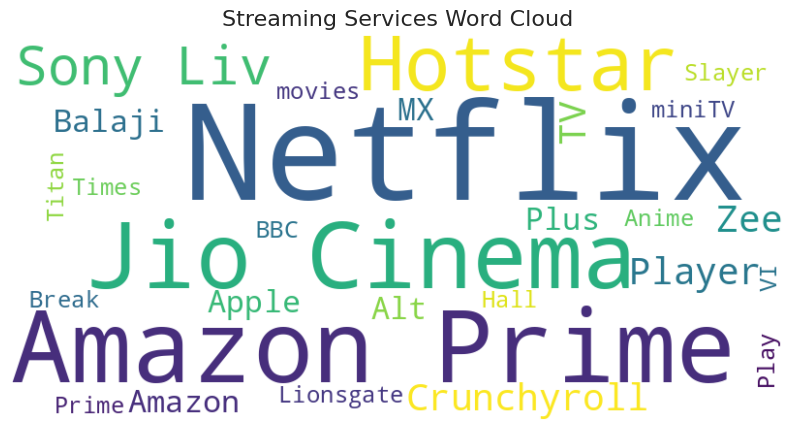

In [169]:
# Combine all service names into a single string
all_services_str = ' '.join(all_services)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_services_str)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Streaming Services Word Cloud', fontsize=16)
plt.show()

In [172]:
movie.drop('Extracted Services', axis=1, inplace=True)
show.drop('Extracted Services', axis=1, inplace=True)

## **Task 3 :- Data Export**

In [174]:
movie = movie[['Title', 'Year', 'Genre', 'IMDB Rating', 'Runtime', 'Age Rating', 'Production Country', 'Streaming Service', 'JustWatch URL']]
show = show[['Title', 'Year', 'Genre', 'IMDB Rating', 'Runtime', 'Age Rating', 'Production Country', 'Streaming Service', 'JustWatch URL']]


In [180]:
def extract_service(streaming_info):
    services = re.findall(r'on ([A-Za-z\s]+)', streaming_info)
    if services:
        return ', '.join(services)  # Join multiple services with commas
    else:
        return 'Unavailable'

movie['Streaming Service'] = movie['Streaming Service'].apply(lambda x: extract_service(str(x)))
show['Streaming Service'] = show['Streaming Service'].apply(lambda x: extract_service(str(x)))

In [182]:
#saving filter data as Filter Data in csv format
show.to_csv('filter_shows_data.csv', index=False)
movie.to_csv('filter_movies_data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

- Movies: https://drive.google.com/file/d/1vSRyCtM13NjB1Fb0lRwBqs0BhFdb9Cbh/view?usp=sharing

- TV Shows: https://drive.google.com/file/d/1ytszzGsRg_OVj8auHwK1gw8S721mepw_/view?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***